# Exploring IMDb Ratings

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 8
plt.rcParams["axes.grid"] = True

## Clean the data

In [2]:
def get_data_csv(csv_file):
  """Cleans data from a CSV file.

  Args:
    csv_file: The path to the CSV file to clean.

  Returns:
    The cleaned data frame.
  """

  # Read the CSV file into a data frame.
  df = pd.read_csv(csv_file)

  return df

In [3]:
def get_data_xls(xls_file,worksheet):
  """Cleans data from a XLS file.

  Args:
    xls_file: The path to the XLS file to clean.

  Returns:
    The cleaned data frame.
  """

  # Read the CSV file into a data frame.
  df = pd.read_excel(xls_file,worksheet)

  return df

In [4]:
def clean_data_drop(df):

    # Replace any invalid values with NaN.
    for column in df.columns:
        df[column] = df[column].replace(to_replace=['-', ''], value=np.nan)
    # Drop any rows with missing values.
    df = df.dropna()
    return df

In [5]:
df_raw = get_data_xls('Movie_Rating_Clean.xlsx','Full')
df_raw.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,primaryGenre,averageRating,numVotes
0,tt0445310,short,The Stolen Plan of the Ruins of Carthage,1910,11,Drama,NaN,NaN
1,tt0445358,short,EugÃ©nie Grandet,1910,10,Short,NaN,NaN
2,tt0430386,short,Le mÃ©decin de service,1910,8,Comedy,5.0,8.0
3,tt0361577,short,The Engineer's Sweetheart,1910,11,Drama,NaN,NaN
4,tt1008019,short,Le petit Chantecler,1910,8,Animation,5.0,59.0


In [6]:
df_index = df_raw.set_index('tconst')
df_index.head()

,titleType,primaryTitle,startYear,runtimeMinutes,primaryGenre,averageRating,numVotes
tconst,,,,,,,
tt0445310,short,The Stolen Plan of the Ruins of Carthage,1910,11,Drama,NaN,NaN
tt0445358,short,EugÃ©nie Grandet,1910,10,Short,NaN,NaN
tt0430386,short,Le mÃ©decin de service,1910,8,Comedy,5.0,8.0
tt0361577,short,The Engineer's Sweetheart,1910,11,Drama,NaN,NaN
tt1008019,short,Le petit Chantecler,1910,8,Animation,5.0,59.0


## Identify Outliers

In [7]:
def add_outlier_column(df, column):
  """Adds a column to the data frame that indicates whether the data point is an outlier.

  Args:
    df: The data frame to add the column to.
    column: The name of the column to check for outliers.

  Returns:
    The data frame with the new outlier column.
  """

  # Calculate the lower and upper bounds.
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Add the outlier column to the data frame.
  df['Outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)

  return df


In [8]:
df_outlier = add_outlier_column(df_index,'numVotes')

In [9]:
df_clean = clean_data_drop(df_index)
df_clean.drop('tt0329254',inplace=True) #drop adult film
df_clean = df_clean[df_clean['titleType'] != 'videoGame']

C:\Users\peter\AppData\Local\Temp\ipykernel_22028\1166753102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('tt0329254',inplace=True) #drop adult film


## Describe the dataset

In [10]:
def describe_dataset(df):
  """Describes the dataset.

  Args:
    df: The data frame to describe.

  Returns:
    The description of the dataset.
  """
  print(df.head())
  # Print the number of rows and columns in the data frame.
  print('The data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

  # Print the summary statistics for each column.
  print('Dataframe summary stats: \n{}'.format(df.describe(include='all')))

  print('Dataframe meta info: \n{}'.format(df.info()))

  print('Column data types: \n{}'.format(df.dtypes))

  # Print the number of outliers in the data set.
  print('There are {} outliers in the data set.'.format(df['Outlier'].sum()))

### Describe data with outliers

In [11]:
describe_dataset(df_clean)

          titleType            primaryTitle  startYear  runtimeMinutes  \
tconst                                                                   
tt0430386     short  Le mÃ©decin de service       1910               8   
tt1008019     short     Le petit Chantecler       1910               8   
tt0234636     short                 Rusalka       1910               9   
tt0001216     short    The Final Settlement       1910              16   
tt0001280     short     Copenhagen by Night       1910              25   

          primaryGenre  averageRating  numVotes  Outlier  
tconst                                                    
tt0430386       Comedy            5.0       8.0    False  
tt1008019    Animation            5.0      59.0    False  
tt0234636        Drama            5.0     121.0    False  
tt0001216        Drama            5.0      40.0    False  
tt0001280        Short            5.0      35.0    False  
The data frame has 319423 rows and 8 columns.
Dataframe summary stat

In [12]:
df_clean.to_csv('imdb-data-clean.csv')

### Describe Data without outliers

In [17]:
df_clean_no_outliers = df_clean[df_clean['Outlier'] == False]
describe_dataset(df_clean_no_outliers) 

          titleType            primaryTitle  startYear  runtimeMinutes  \
tconst                                                                   
tt0430386     short  Le mÃ©decin de service       1910               8   
tt1008019     short     Le petit Chantecler       1910               8   
tt0234636     short                 Rusalka       1910               9   
tt0001216     short    The Final Settlement       1910              16   
tt0001280     short     Copenhagen by Night       1910              25   

          primaryGenre  averageRating  numVotes  Outlier  
tconst                                                    
tt0430386       Comedy            5.0       8.0    False  
tt1008019    Animation            5.0      59.0    False  
tt0234636        Drama            5.0     121.0    False  
tt0001216        Drama            5.0      40.0    False  
tt0001280        Short            5.0      35.0    False  
The data frame has 273733 rows and 8 columns.
Dataframe summary stat

### Keep outliers

## Explore Data

In [18]:
df_outlier.corr()

,startYear,runtimeMinutes,averageRating,numVotes,Outlier
startYear,1.000000,0.002481,0.115457,0.030517,0.058920
runtimeMinutes,0.002481,1.000000,-0.161219,0.065066,0.170125
averageRating,0.115457,-0.161219,1.000000,0.031430,-0.000658
numVotes,0.030517,0.065066,0.031430,1.000000,0.164829
Outlier,0.058920,0.170125,-0.000658,0.164829,1.000000


In [19]:
df_clean_no_outliers.corr()

,startYear,runtimeMinutes,averageRating,numVotes,Outlier
startYear,1.000000,-0.018429,0.129643,0.017603,NaN
runtimeMinutes,-0.018429,1.000000,-0.161187,0.089536,NaN
averageRating,0.129643,-0.161187,1.000000,-0.043847,NaN
numVotes,0.017603,0.089536,-0.043847,1.000000,NaN
Outlier,NaN,NaN,NaN,NaN,NaN


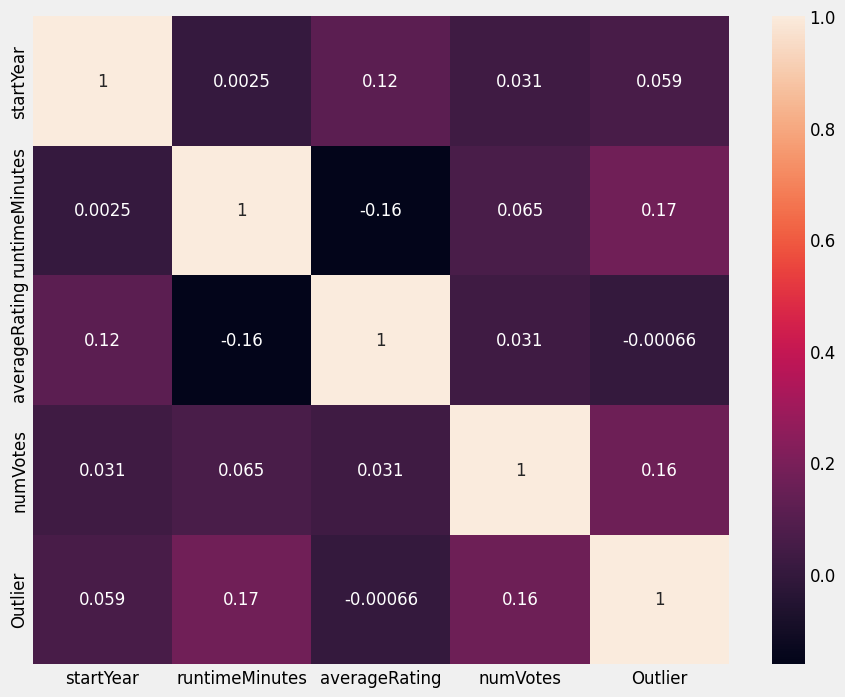

In [20]:
sns.heatmap(df_outlier.corr(), annot=True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

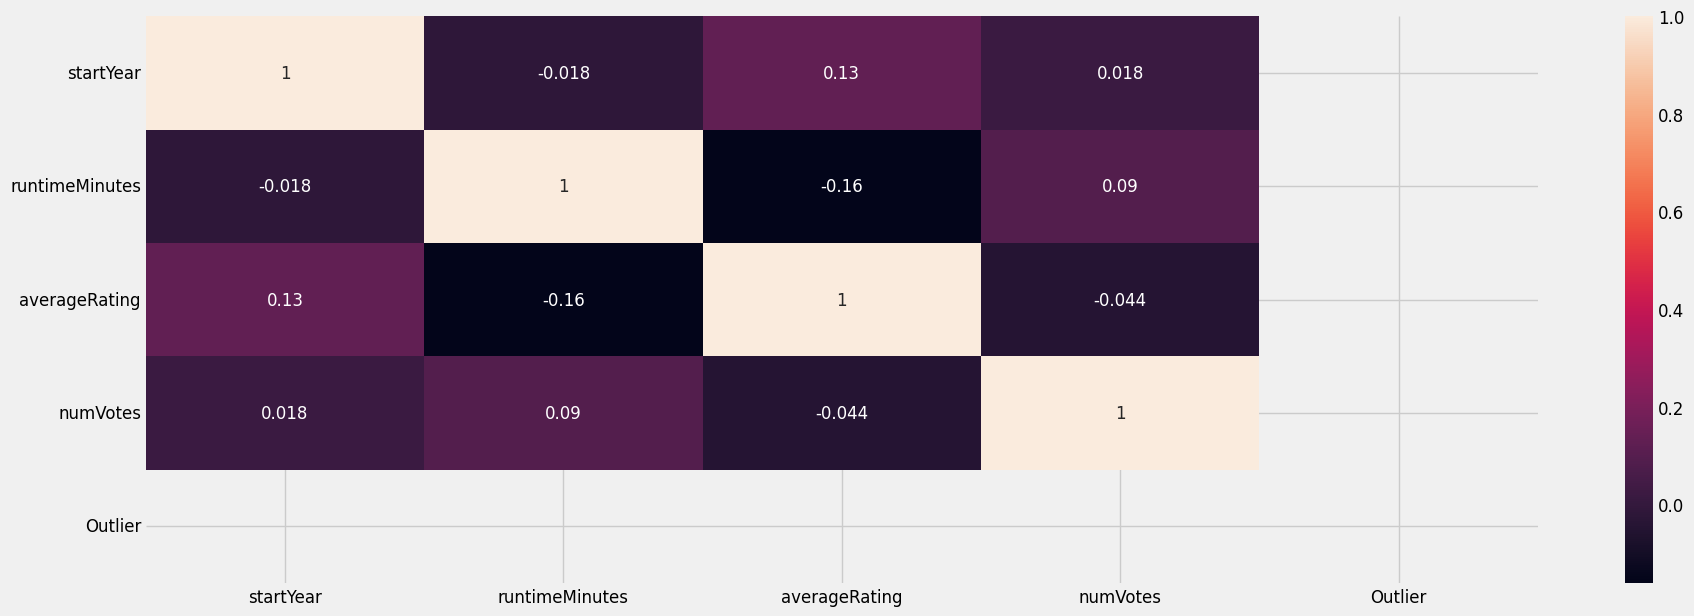

In [21]:
sns.heatmap(df_clean_no_outliers.corr(), annot=True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

### There are NO SIGNIFICANT correlations between the different types of continuous data

## Group Data

In [23]:
df_grouped_genre = df_clean.groupby('primaryGenre')[['averageRating']].mean().sort_values(by='averageRating',ascending=False)
df_grouped_genre

,averageRating
primaryGenre,
Western,7.276277
Music,7.258560
Documentary,7.046561
Crime,6.957439
Sport,6.951220
Biography,6.882812
Family,6.789549
Adventure,6.745156
Comedy,6.724519


In [24]:
df_grouped_type = df_clean.groupby('titleType')
df_grouped_type_rating = df_grouped_type[['averageRating']].mean().sort_values('averageRating',ascending=False)
print(df_grouped_type_rating)

              averageRating
titleType                  
tvEpisode          7.419084
tvMiniSeries       7.261034
tvSpecial          7.065425
tvSeries           6.930043
tvShort            6.780201
tvMovie            6.612624
short              6.489226
video              6.355741
movie              6.079072


In [25]:
df_grouped_genre_size = df_clean.groupby('primaryGenre').size().sort_values(ascending=False)
print(df_grouped_genre_size)

primaryGenre
Comedy         86289
Drama          69750
Action         40073
Crime          26879
Documentary    21370
Adventure      18321
Animation      15090
Short           8842
Western         7069
Biography       4736
Horror          4634
Family          3483
Music           2278
Thriller        1743
Romance         1394
Fantasy         1319
Mystery         1106
Musical         1062
Sci-Fi           950
Reality-TV       753
Game-Show        567
Talk-Show        445
News             402
Sport            287
History          276
War              272
Film-Noir         33
dtype: int64


In [26]:
df_grouped_year = df_clean.groupby('startYear').agg('mean')
print(df_grouped_year)

           runtimeMinutes  averageRating     numVotes   Outlier
startYear                                                      
1910            13.648148       5.449074   116.611111  0.046296
1911            17.383673       5.359184    89.371429  0.020408
1912            16.450128       5.388747   100.797954  0.035806
1913            26.345794       5.529595   109.461059  0.046729
1914            46.762846       5.762846   320.130435  0.193676
...                   ...            ...          ...       ...
2001            59.961270       6.806448  2935.030693  0.183579
2002            56.856317       6.804401  2563.374883  0.173847
2003            57.073531       6.796191  2449.017797  0.168527
2004            56.846794       6.822648  2602.188454  0.162018
2005            55.004252       6.901288  2271.734115  0.160552

[96 rows x 4 columns]


In [27]:
df_grouped_year_agg_numVotes = df_clean.groupby('startYear')[['numVotes']].mean()
print(df_grouped_year_agg_numVotes)

              numVotes
startYear             
1910        116.611111
1911         89.371429
1912        100.797954
1913        109.461059
1914        320.130435
...                ...
2001       2935.030693
2002       2563.374883
2003       2449.017797
2004       2602.188454
2005       2271.734115

[96 rows x 1 columns]


In [28]:
df_grouped_yearGenre = df_clean.groupby(['startYear','primaryGenre']).agg({'averageRating':'mean'})
print(df_grouped_yearGenre)

                        averageRating
startYear primaryGenre               
1910      Action             5.500000
          Adventure          5.800000
          Animation          5.666667
          Biography          4.666667
          Comedy             5.541667
...                               ...
2005      Sport              7.311111
          Talk-Show          5.811321
          Thriller           5.706667
          War                7.000000
          Western            6.750000

[2125 rows x 1 columns]


## Plot Data

In [29]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    
    """ 
    example usage for 2 plots:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
    my_plotter(ax1, data1, data2, {'marker': 'x','color':'orange'})
    my_plotter(ax2, data3, data4, {'marker': 'o','color':'blue'})

    can change .plot for different types of graphs

    """

    return out    


Text(0.5, 1.0, 'Count of Rating Score')

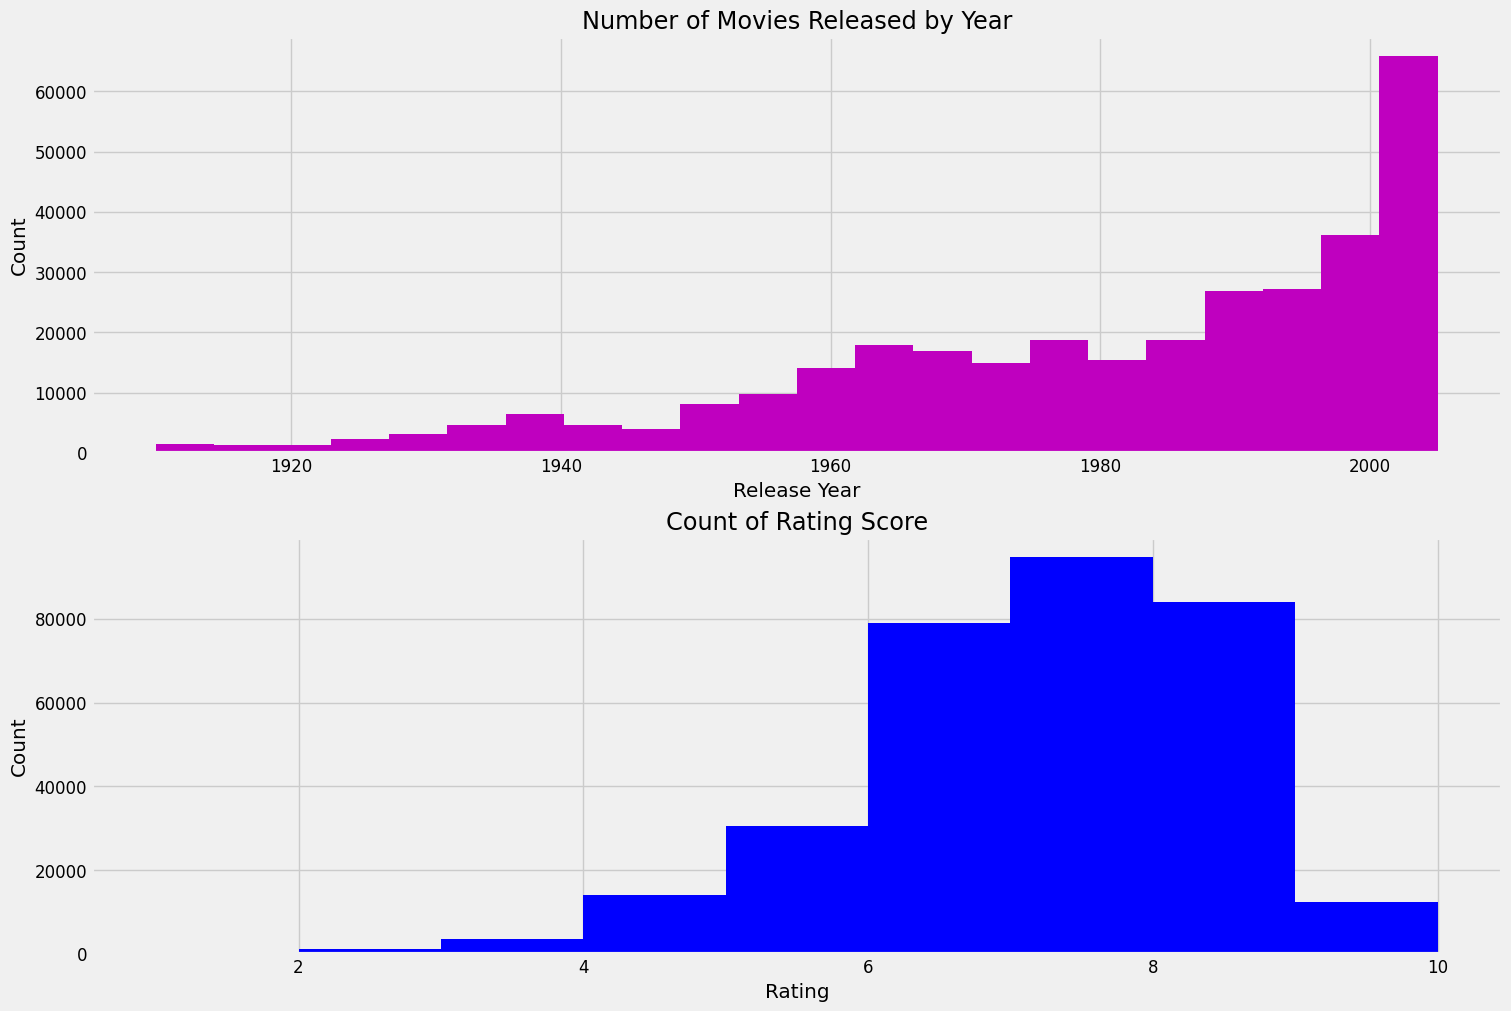

In [31]:
fig, axs = plt.subplots(2,1,figsize=(15,10),layout='constrained')
axs[0].hist(df_clean.startYear,bins=22,color='m')
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Count')
axs[0].set_title('Number of Movies Released by Year')

axs[1].hist(df_clean.averageRating,bins=9,color='b')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Count')
axs[1].set_title('Count of Rating Score')

### Both the distribution of rating score and number of votes are left-skewed

Text(0, 0.5, 'Number of Votes')

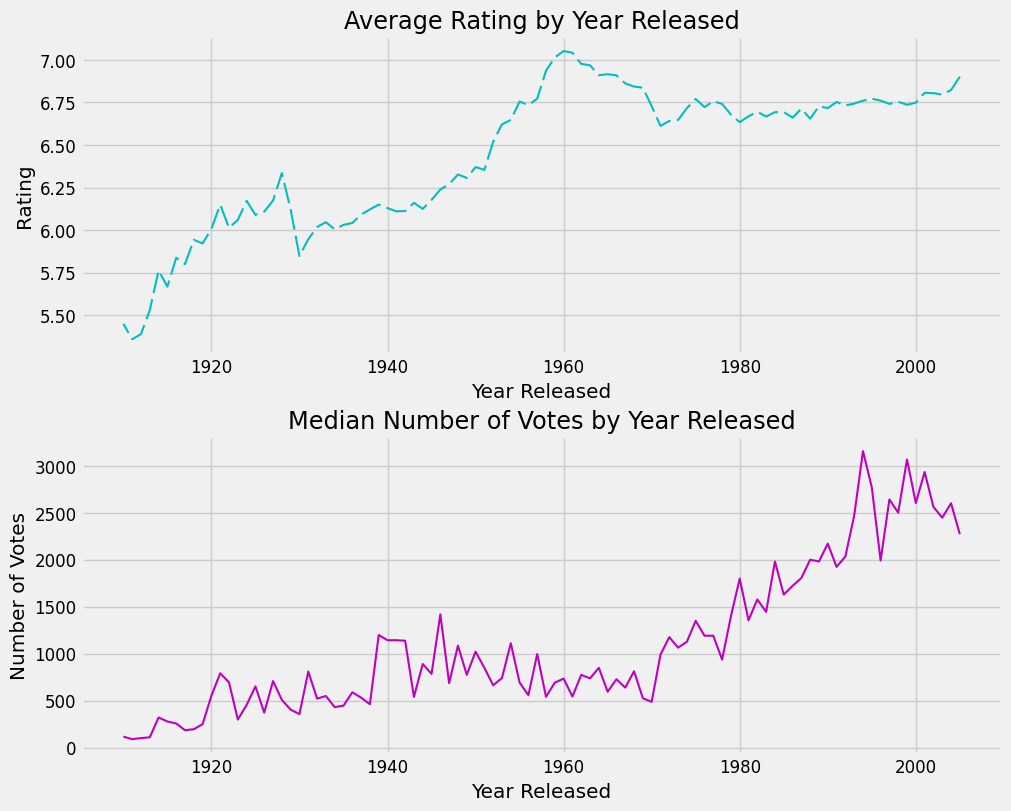

In [35]:
fig, ax = plt.subplots(2,1,layout='constrained')
ax[0].plot(df_grouped_year.index,df_grouped_year['averageRating'],color='c',linestyle=(5,(10,3)))
ax[0].set_title('Average Rating by Year Released')
ax[0].set_xlabel('Year Released')
ax[0].set_ylabel('Rating')

ax[1].plot(df_grouped_year_agg_numVotes.index,df_grouped_year_agg_numVotes,color='m')
ax[1].set_title('Median Number of Votes by Year Released')
ax[1].set_xlabel('Year Released')
ax[1].set_ylabel('Number of Votes')

C:\Users\peter\AppData\Local\Temp\ipykernel_22028\2978262735.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_grouped_genre.index,rotation=45, ha='right')


Text(0.5, 1.0, 'Genre by Average Rating')

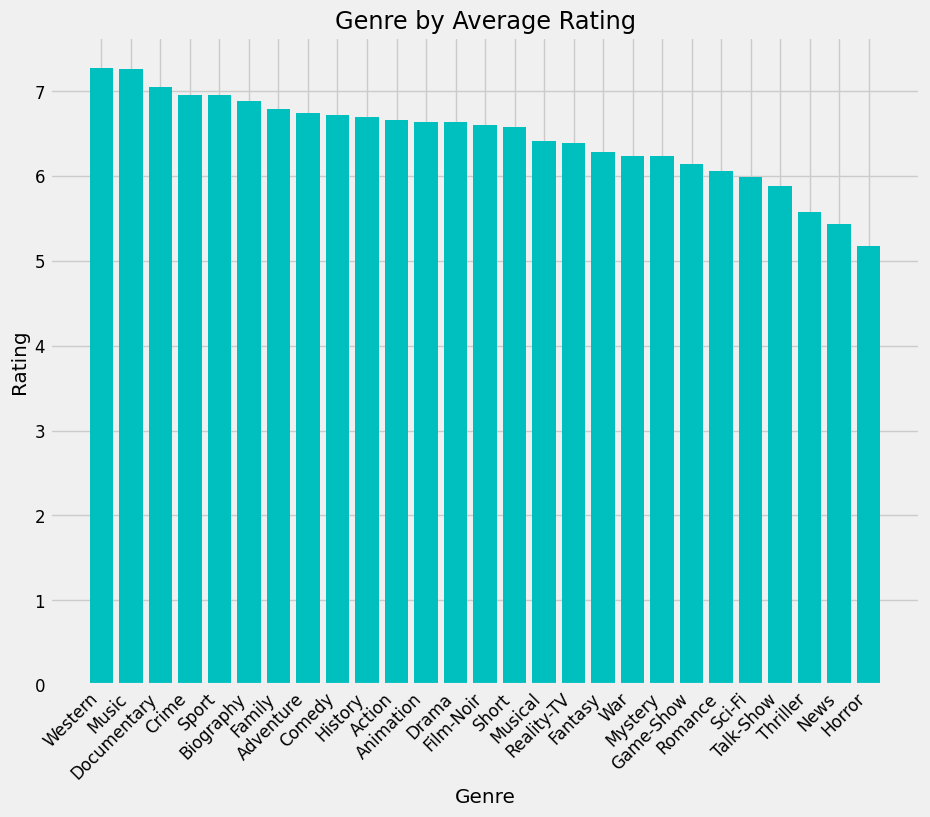

In [36]:
fig, ax = plt.subplots()
ax.bar(df_grouped_genre.index,df_grouped_genre.averageRating,color='c')
ax.set_xticklabels(df_grouped_genre.index,rotation=45, ha='right')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
ax.set_title('Genre by Average Rating')

### The Western remains king of the genres, with horror coming in last by a fair margin

C:\Users\peter\AppData\Local\Temp\ipykernel_22028\436496701.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_grouped_genre_size.index,rotation=45, ha='right')


Text(0.5, 1.0, 'Count of TV/Movies by Genre')

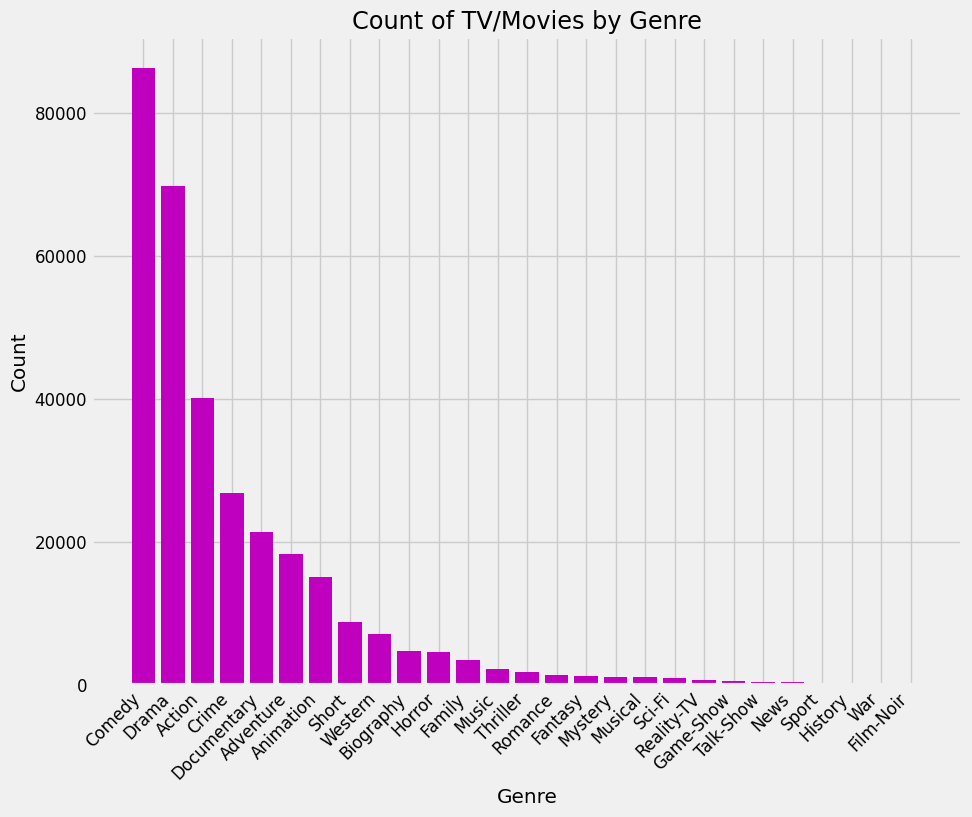

In [37]:
fig, ax = plt.subplots()
ax.bar(df_grouped_genre_size.index,df_grouped_genre_size,color='m')
ax.set_xticklabels(df_grouped_genre_size.index,rotation=45, ha='right')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Count of TV/Movies by Genre')

### It seems there's plenty out there to make you laugh, as most represented genre of media on IMDb is the Comedy

**Count of movies by genre is a little bit zipffy**

The bottom quartile for the count of genre is:

In [ ]:
df_grouped_genre.size().quantile(.25)

660.0

Text(0.5, 1.0, 'Average Rating by Type of Media')

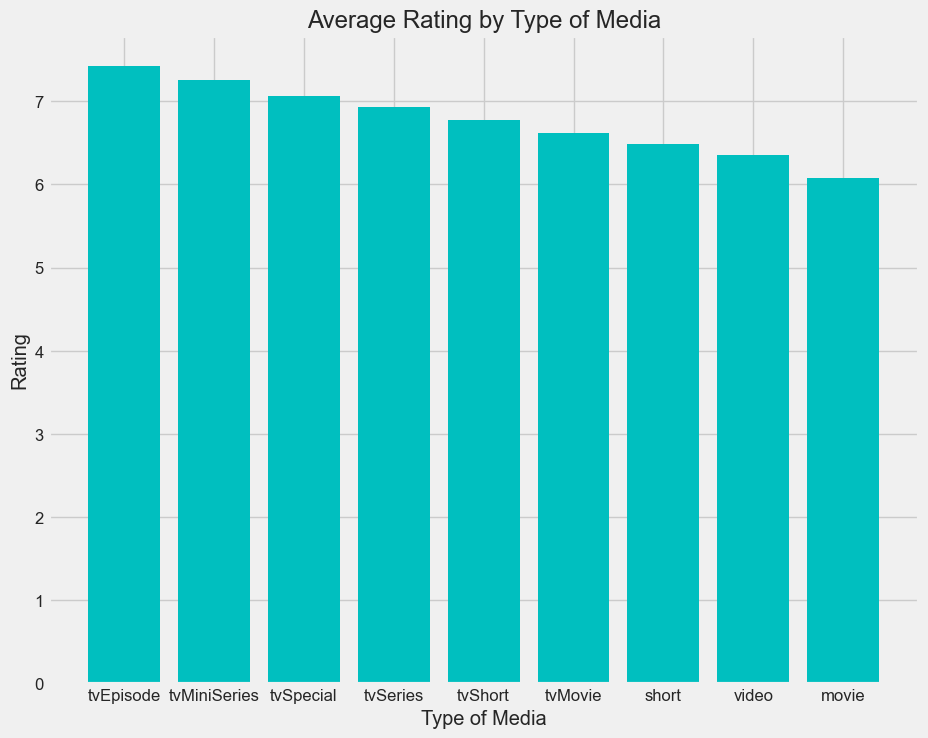

In [82]:
fig, ax = plt.subplots()
ax.bar(df_grouped_type_rating.index,df_grouped_type_rating['averageRating'],color='c')
ax.set_xlabel('Type of Media')
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Type of Media')

### Moives tend to be rated the poorest on IMDb, with TV Episodes scoring a higher average rating by nearly a whole point

Number of entries on IMDb by type of media:

In [ ]:
df_grouped_type.size()

titleType
movie           117994
short            35781
tvEpisode       113908
tvMiniSeries      2651
tvMovie          20120
tvSeries         16553
tvShort            596
tvSpecial         1987
video             9833
videoGame           23
dtype: int64

### create pivot table

In [42]:
keep_values = ['Comedy','Drama','Action','Crime','Documentary','Adventure','Animation','Short']
top_genres = df_clean[df_clean['primaryGenre'].isin(keep_values)]

year_genre_rating_pivot = pd.pivot_table(top_genres,'averageRating',['startYear','primaryGenre'])
print(year_genre_rating_pivot)

                        averageRating
startYear primaryGenre               
1910      Action             5.500000
          Adventure          5.800000
          Animation          5.666667
          Comedy             5.541667
          Crime              4.000000
...                               ...
2005      Comedy             6.833986
          Crime              7.360173
          Documentary        7.252311
          Drama              6.813693
          Short              6.880803

[768 rows x 1 columns]


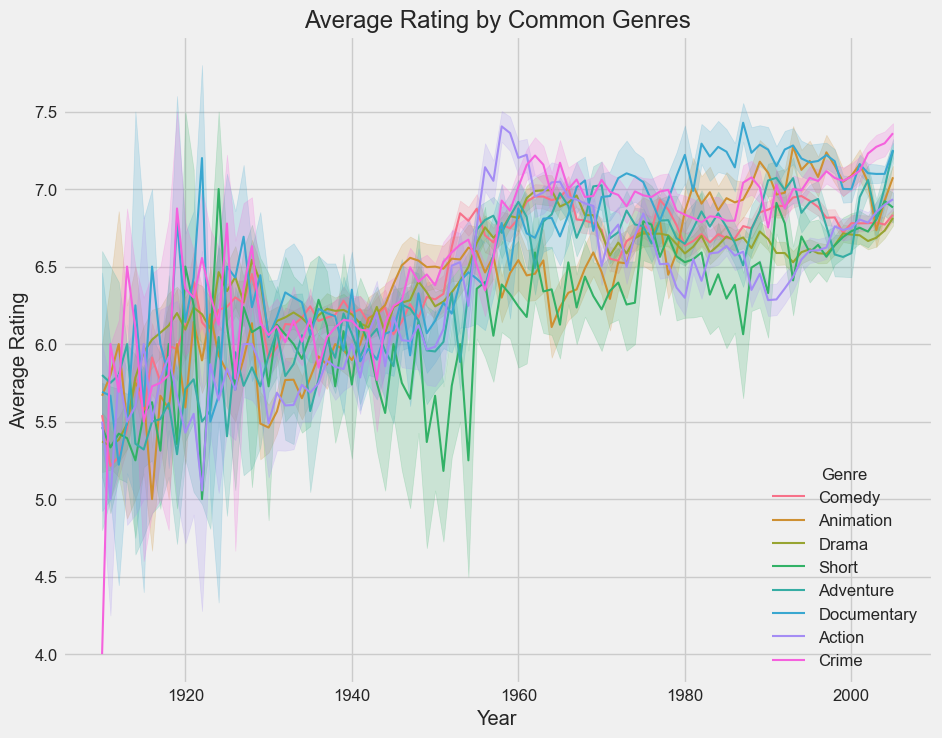

In [67]:
sns.lineplot(top_genres,x='startYear',y='averageRating',hue='primaryGenre')
plt.title('Average Rating by Common Genres')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend().set_title('Genre')
plt.show()

## Predictions

In [68]:
average_rating = df_clean.groupby('startYear')['averageRating'].mean()
x = np.array(average_rating.index.tolist()).reshape(-1,1)
print(x)
y = average_rating.array.reshape(-1,1)
print(y)
model = LinearRegression()
model.fit(x,y)

[[1910]
 [1911]
 [1912]
 [1913]
 [1914]
 [1915]
 [1916]
 [1917]
 [1918]
 [1919]
 [1920]
 [1921]
 [1922]
 [1923]
 [1924]
 [1925]
 [1926]
 [1927]
 [1928]
 [1929]
 [1930]
 [1931]
 [1932]
 [1933]
 [1934]
 [1935]
 [1936]
 [1937]
 [1938]
 [1939]
 [1940]
 [1941]
 [1942]
 [1943]
 [1944]
 [1945]
 [1946]
 [1947]
 [1948]
 [1949]
 [1950]
 [1951]
 [1952]
 [1953]
 [1954]
 [1955]
 [1956]
 [1957]
 [1958]
 [1959]
 [1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]]
<PandasArray>
[
[5.449074074074074],
[5.359183673469388],
[5.388746803069053],
[5.529595015576324],
[5.762845849802371],
[5.667711598746082],
[5.837370242214533],
[5.8],
[5.942760942760943],
[5.921630094043887],
[6.007042253521127]

LinearRegression()

In [69]:
y_pred = model.predict(x)

Text(0, 0.5, 'Average Rating')

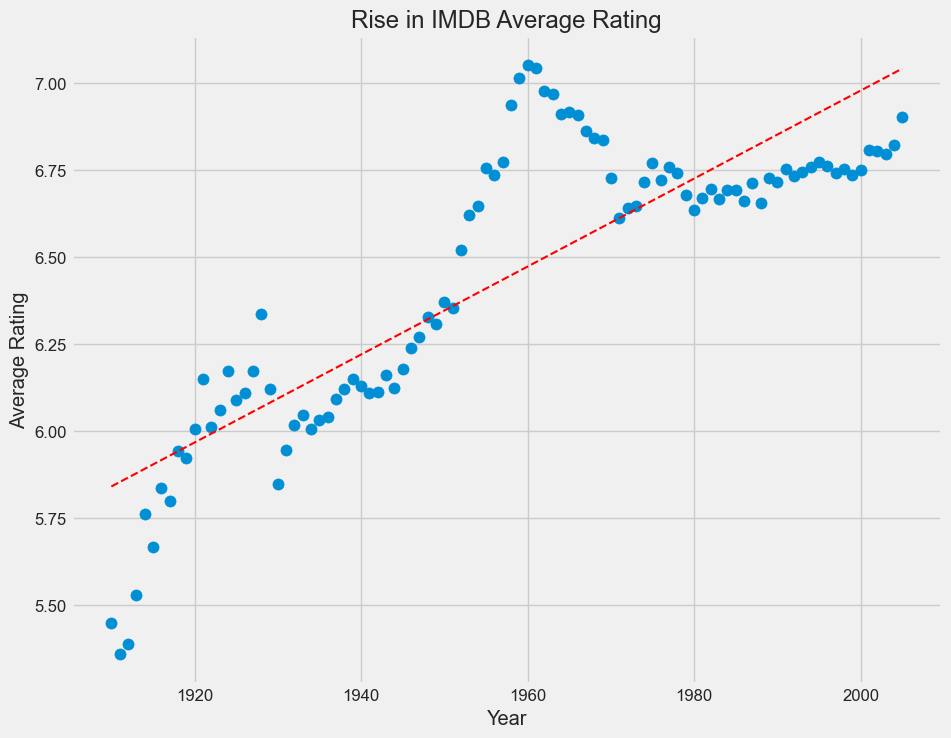

In [71]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_pred,'r--')
plt.title('Rise in IMDB Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')

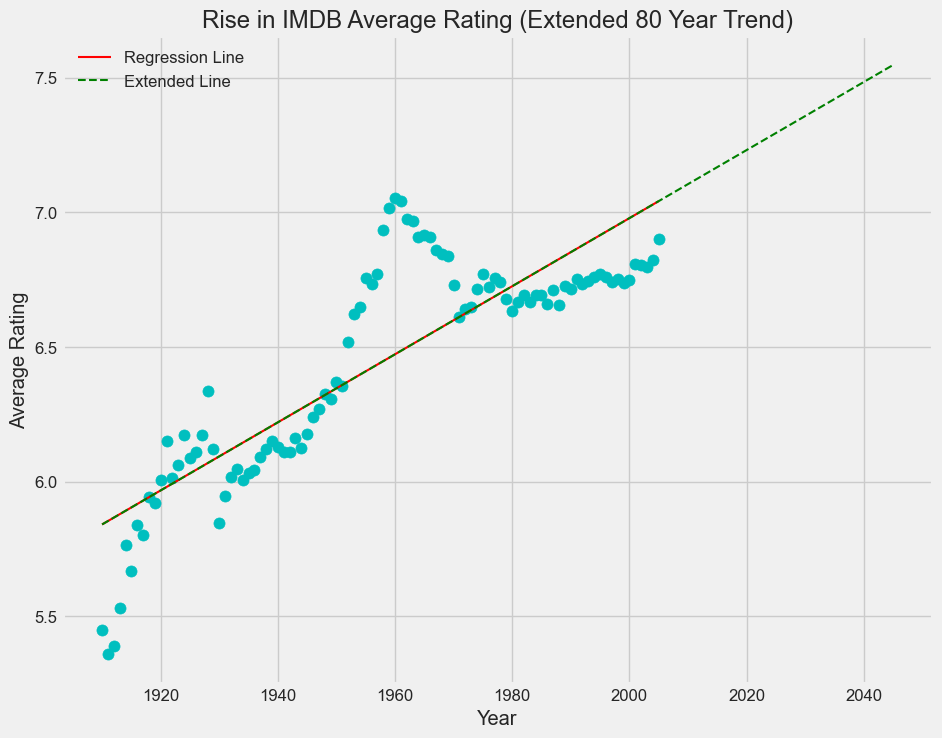

In [72]:
# Extend the regression line
x_ext = np.linspace(x.min(), x.max() + 40, 100).reshape(-1, 1) #linspace generate evenly spaced datapoints, shape them into column
y_ext = model.predict(x_ext) #use model to predict

# Plot the extended line
plt.scatter(x, y,color='c')
plt.plot(x, y_pred, 'r', label='Regression Line')
plt.plot(x_ext, y_ext, 'g--', label='Extended Line')
plt.title('Rise in IMDB Average Rating (Extended 80 Year Trend)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

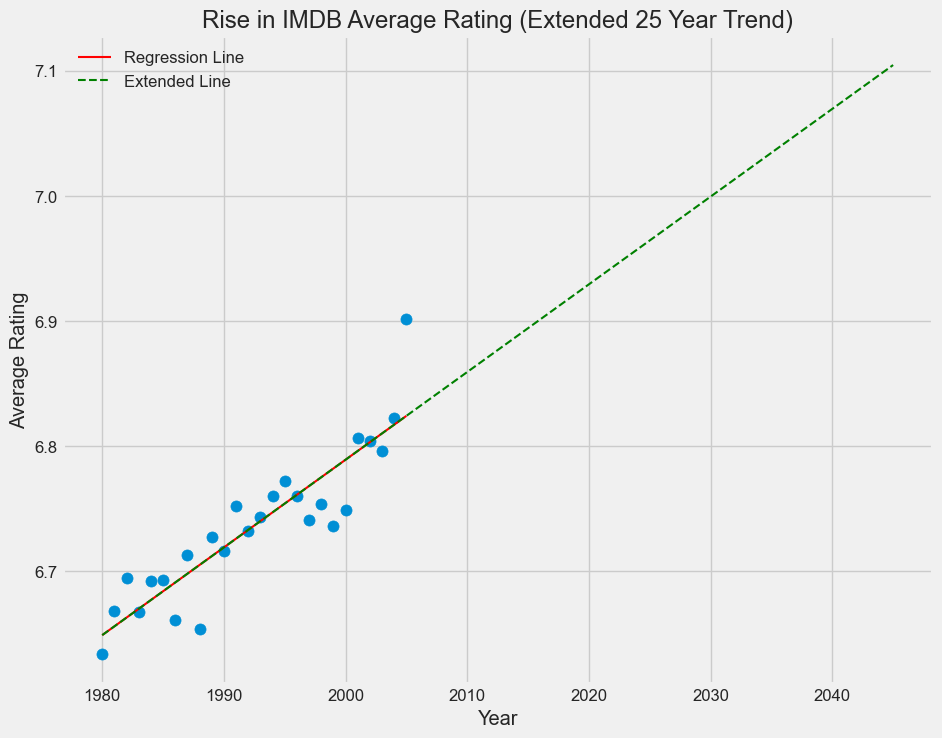

In [74]:
df_80s = df_clean[df_clean['startYear'] >= 1980]
eighties_average_rating = df_80s.groupby('startYear')['averageRating'].mean()
x = np.array(eighties_average_rating.index.tolist()).reshape(-1,1)
y = eighties_average_rating.array.reshape(-1,1)
model_80s = LinearRegression()
model_80s.fit(x,y)

# Compute the predicted values
y_pred = model_80s.predict(x)

# Extend the regression line
x_ext = np.linspace(x.min(), x.max() + 40, 100).reshape(-1, 1) #linspace generate evenly spaced datapoints, shape them into column
y_ext = model_80s.predict(x_ext) #use model to predict

# Plot the extended line
plt.scatter(x, y)
plt.plot(x, y_pred, 'r', label='Regression Line')
plt.plot(x_ext, y_ext, 'g--', label='Extended Line')
plt.title('Rise in IMDB Average Rating (Extended 25 Year Trend)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

### This suggests that in 2030, the average rating on IMDb will be between 7.0 and 7.4
### To make an above average film in 2030, it must have a rating approximately >= 7.5

In [ ]:
def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('adult.data.csv')

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df.groupby('race')['race'].count()

    # What is the average age of men?
    average_age_men = round(df[df['sex'] == 'Male']['age'].mean(),1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = round(len(df[df['education'] == 'Bachelors']['education']) / len(df) * 100,1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]
    lower_education = df[~(df['education'] == 'Bachelors') & ~(df['education'] == 'Masters') & ~(df['education'] == 'Doctorate')]

    # percentage with salary >50K
    higher_education_rich = round(higher_education[higher_education['salary'] == '>50K']['salary'].count() / len(higher_education) * 100,1)
    lower_education_rich = round(lower_education[lower_education['salary'] == '>50K']['salary'].count() / len(lower_education) * 100,1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week'] == 1]

    rich_percentage = len(num_min_workers[num_min_workers['salary'] == '>50K']) / len(num_min_workers) * 100

    # What country has the highest percentage of people that earn >50K?
    highest_earning_country = ((df[df['salary'] == '>50K'].groupby('native-country').size() / df.groupby('native-country').size()) * 100).sort_values(ascending=False).index[0]
    
    highest_earning_country_percentage = round(((df[df['salary'] == '>50K'].groupby('native-country').size() / df.groupby('native-country').size()) * 100).sort_values(ascending=False)[0],1)
    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')].groupby('occupation').size().sort_values(ascending=False).index[0]